In [7]:
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs

In [3]:
%matplotlib inline

full_data = pd.read_csv('titanic_data.csv')

In [9]:
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis=1)
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
def accuracy_score(truth, pred):
    if len(truth) == len(pred): 
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


In [12]:
def predictions_0(data):
    predictions = []
    for _, passenger in data.iterrows():
        predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_0(data)

In [13]:
predictions.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

### Question 1:

In [14]:
print accuracy_score(outcomes,predictions)

Predictions have an accuracy of 61.62%.


**Answer:** 61.62%

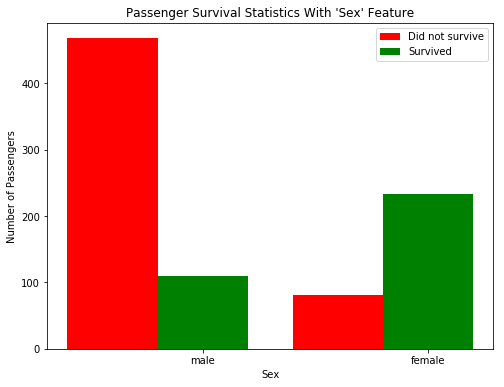

In [15]:
vs.survival_stats(data, outcomes, 'Sex')

In [16]:
def predictions_1(data):
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_1(data)

In [17]:
predictions.head()

0    0
1    1
2    1
3    1
4    0
dtype: int64

### Question 2:

In [18]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


**Answer:** 78.68%

***

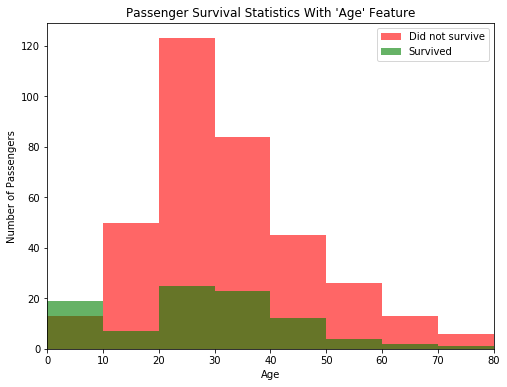

In [19]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [22]:
def predictions_2(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        sex = passenger['Sex']
        if (sex == 'male' and passenger['Age']<10) or (sex == 'female'):
                predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)

predictions = predictions_2(data)

In [23]:
predictions.head()

0    0
1    1
2    1
3    1
4    0
dtype: int64

### Question 3:

In [24]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


**Answer:** 79.35%

***

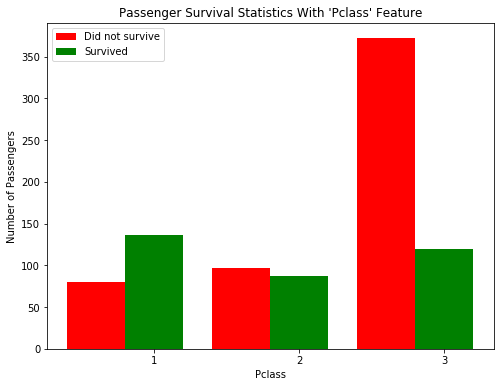

In [63]:
vs.survival_stats(data, outcomes, 'Pclass')

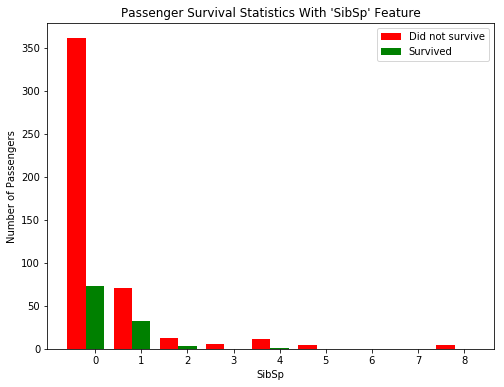

In [60]:
vs.survival_stats(data, outcomes, 'SibSp',["Sex == 'male'"])

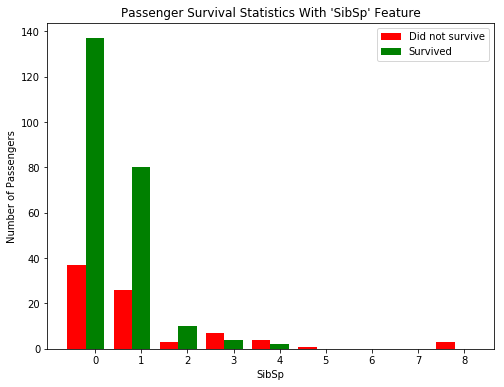

In [73]:
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'"])

In [75]:
def predictions_3(data):
    predictions = []
    for _, passenger in data.iterrows():
        sex = passenger['Sex']
        age = passenger['Age']
        pclass = passenger['Pclass']
        sibsp = passenger['SibSp']
        parch = passenger['Parch']
        if (sex=='female' and pclass<3) or (age<10):
            predictions.append(1)
        else:
            predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_3(data)
print accuracy_score(outcomes,predictions)

Predictions have an accuracy of 79.46%.


### Question 4

**Steps:** plotting each feature and try to maximize the accuracy as possible

**Answer:** 79.46%

***
### Question 5:
**Answer:** Predicting houses prices, by applying similar algorithms we can predict prices of houses in some area according to data given for it.
Features like Area of the house, Number of floors can be used.